In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)#we are using this as there are missing values in the total_bedroom so we are equalizing by removing the missing amount from all the other variables with the help of the dropna and inplace = true helps them to keep in place

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [11]:
train_data = X_train.join(y_train)#we have joined the x_train and y_train
z = train_data.drop(['ocean_proximity'],axis = 1)
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17711,-121.81,37.33,4.0,5532.0,778.0,3651.0,770.0,7.2982,343000.0
19704,-121.64,39.11,18.0,3212.0,542.0,1817.0,508.0,3.3793,92900.0
9512,-123.21,39.15,52.0,1370.0,258.0,617.0,228.0,2.5500,112900.0
17710,-121.83,37.32,26.0,1125.0,210.0,943.0,214.0,4.8250,181000.0
239,-122.20,37.79,45.0,2021.0,528.0,1410.0,480.0,2.7788,115400.0
...,...,...,...,...,...,...,...,...,...
15143,-116.90,32.84,18.0,4215.0,810.0,2104.0,773.0,4.0873,146900.0
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,171300.0
7359,-118.18,33.96,20.0,427.0,118.0,402.0,105.0,1.4167,137500.0
17708,-121.82,37.32,10.0,2506.0,623.0,2634.0,622.0,3.1350,231400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

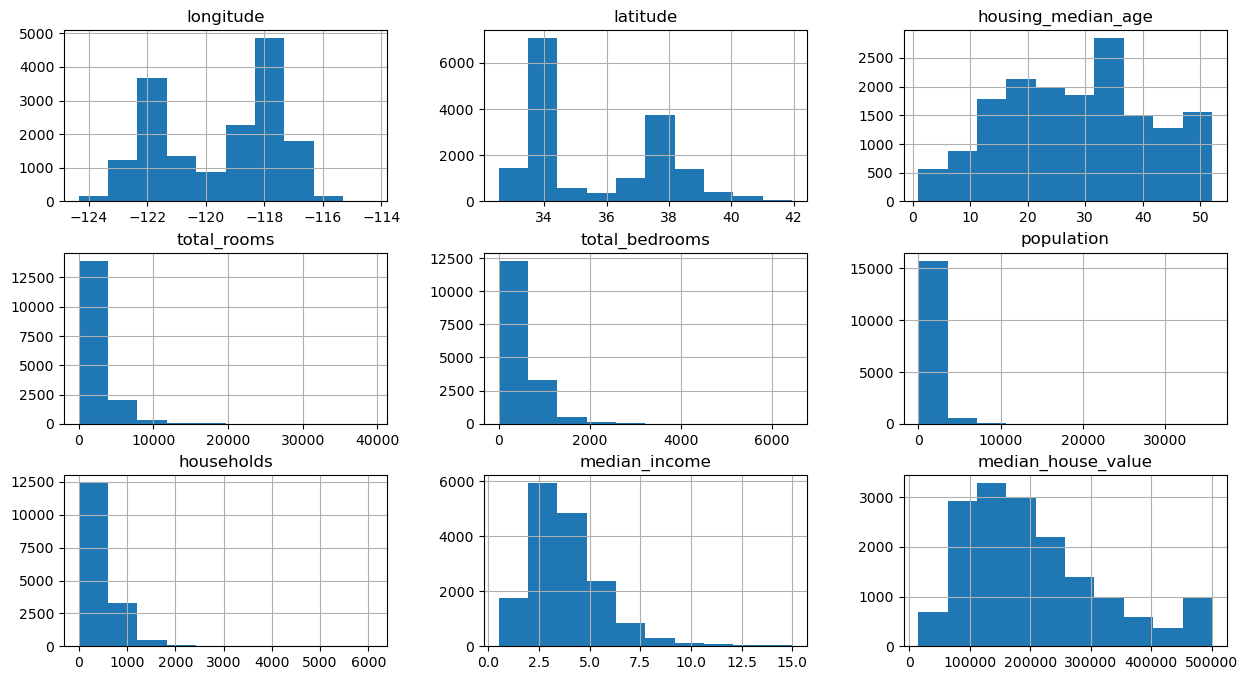

In [12]:
train_data.hist(figsize=(15,8))#hist gives us the train_data in the form of a histogram

In [13]:
z.corr()#A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924733,-0.105005,0.036435,0.060114,0.088826,0.046665,-0.016901,-0.046889
latitude,-0.924733,1.000000,0.007020,-0.030281,-0.059653,-0.100154,-0.064662,-0.079870,-0.144510
housing_median_age,-0.105005,0.007020,1.000000,-0.358061,-0.321571,-0.294478,-0.303757,-0.109673,0.112429
total_rooms,0.036435,-0.030281,-0.358061,1.000000,0.931954,0.857043,0.920435,0.200332,0.137383
total_bedrooms,0.060114,-0.059653,-0.321571,0.931954,1.000000,0.875770,0.979493,-0.002628,0.055160
population,0.088826,-0.100154,-0.294478,0.857043,0.875770,1.000000,0.905235,0.011915,-0.018172
households,0.046665,-0.064662,-0.303757,0.920435,0.979493,0.905235,1.000000,0.019143,0.071765
median_income,-0.016901,-0.079870,-0.109673,0.200332,-0.002628,0.011915,0.019143,1.000000,0.687248
median_house_value,-0.046889,-0.144510,0.112429,0.137383,0.055160,-0.018172,0.071765,0.687248,1.000000


<Axes: >

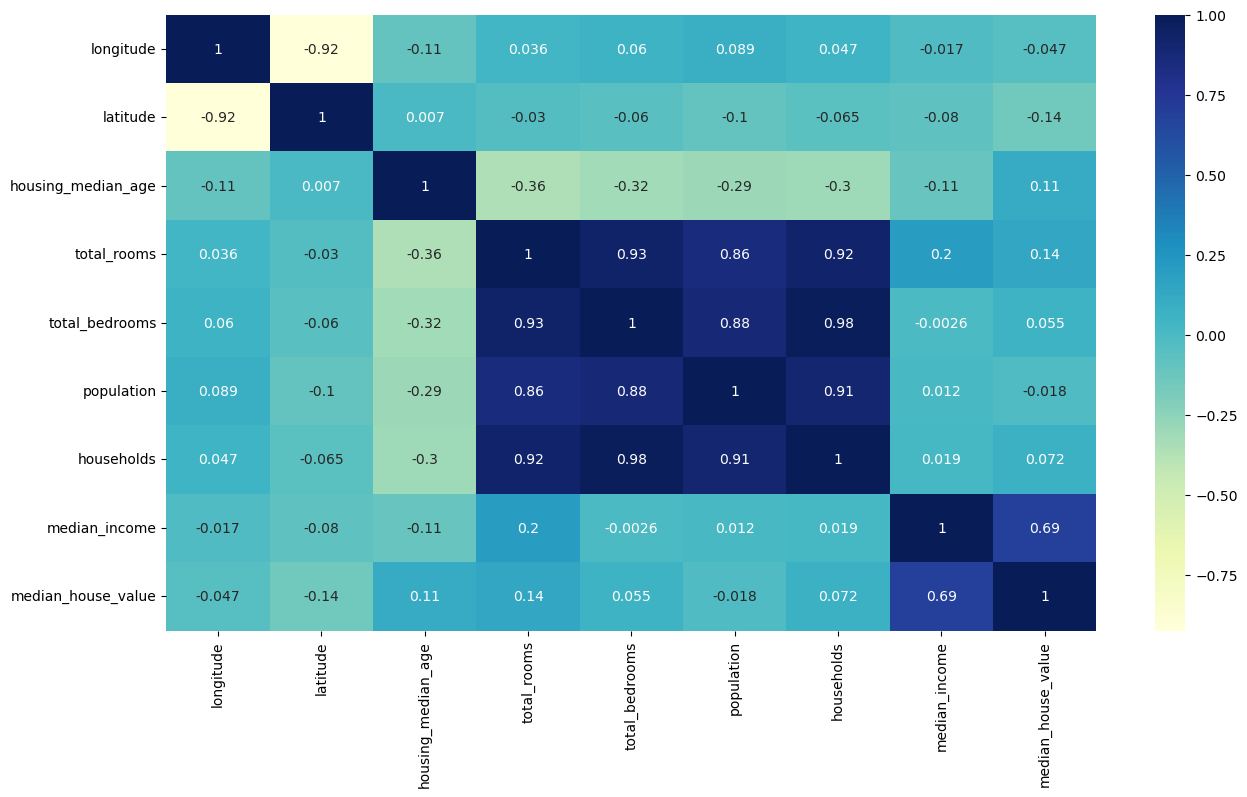

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(z.corr() , annot=True , cmap= "YlGnBu" )

In [15]:
#we are taking the log of the feature variables which are either right skewed or left skewed in order to bring them into a normal distribution form , and 1 is added to each of them if in case the variable was zero
train_data['total_rooms'] = np.log(train_data["total_rooms"] + 1)
train_data['total_bedrooms'] = np.log(train_data["total_bedrooms"] + 1)
train_data['population'] = np.log(train_data["population"] + 1)
train_data['households'] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

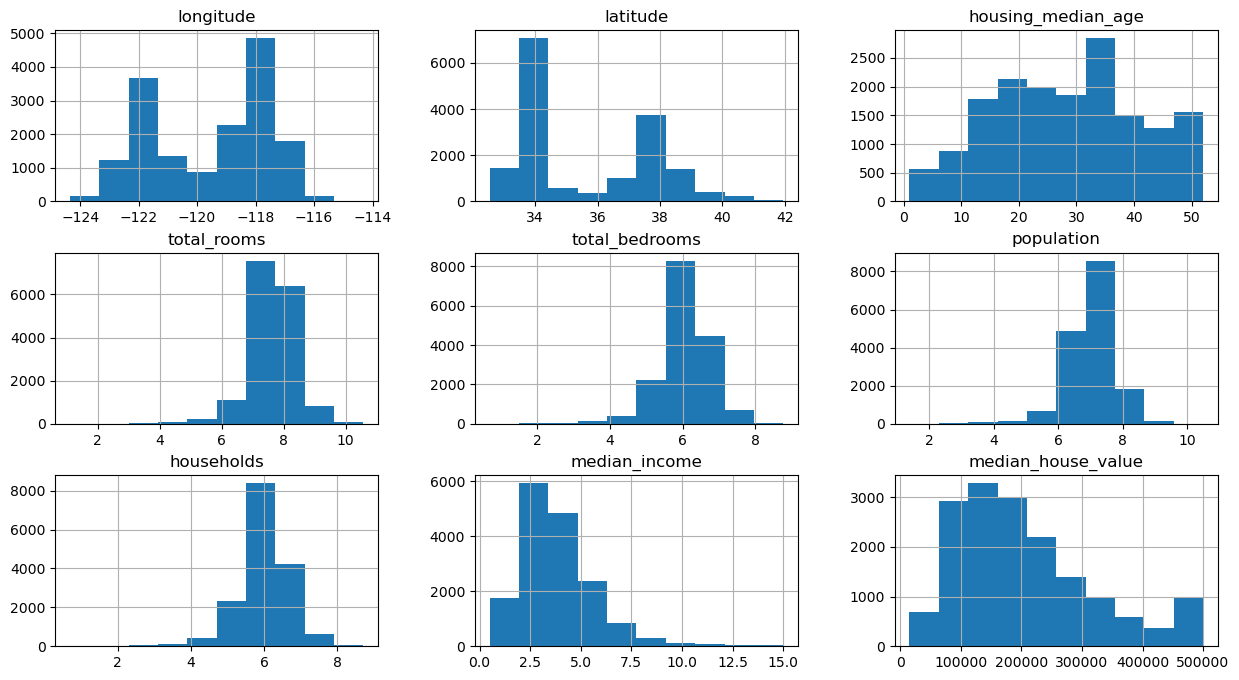

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()# done in order to find the number of values represented by each of the variables in ocean_proximity   

ocean_proximity
<1H OCEAN     7188
INLAND        5252
NEAR OCEAN    2076
NEAR BAY      1826
ISLAND           4
Name: count, dtype: int64

In [18]:
#OneHotEncoding the categorical variable
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17711,True,False,False,False,False
19704,False,True,False,False,False
9512,True,False,False,False,False
17710,True,False,False,False,False
239,False,False,False,True,False
...,...,...,...,...,...
15143,True,False,False,False,False
16718,True,False,False,False,False
7359,True,False,False,False,False
17708,True,False,False,False,False


In [19]:
train_data = z.join(pd.get_dummies(train_data.ocean_proximity))
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17711,-121.81,37.33,4.0,5532.0,778.0,3651.0,770.0,7.2982,343000.0,True,False,False,False,False
19704,-121.64,39.11,18.0,3212.0,542.0,1817.0,508.0,3.3793,92900.0,False,True,False,False,False
9512,-123.21,39.15,52.0,1370.0,258.0,617.0,228.0,2.5500,112900.0,True,False,False,False,False
17710,-121.83,37.32,26.0,1125.0,210.0,943.0,214.0,4.8250,181000.0,True,False,False,False,False
239,-122.20,37.79,45.0,2021.0,528.0,1410.0,480.0,2.7788,115400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15143,-116.90,32.84,18.0,4215.0,810.0,2104.0,773.0,4.0873,146900.0,True,False,False,False,False
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,171300.0,True,False,False,False,False
7359,-118.18,33.96,20.0,427.0,118.0,402.0,105.0,1.4167,137500.0,True,False,False,False,False
17708,-121.82,37.32,10.0,2506.0,623.0,2634.0,622.0,3.1350,231400.0,True,False,False,False,False


<Axes: >

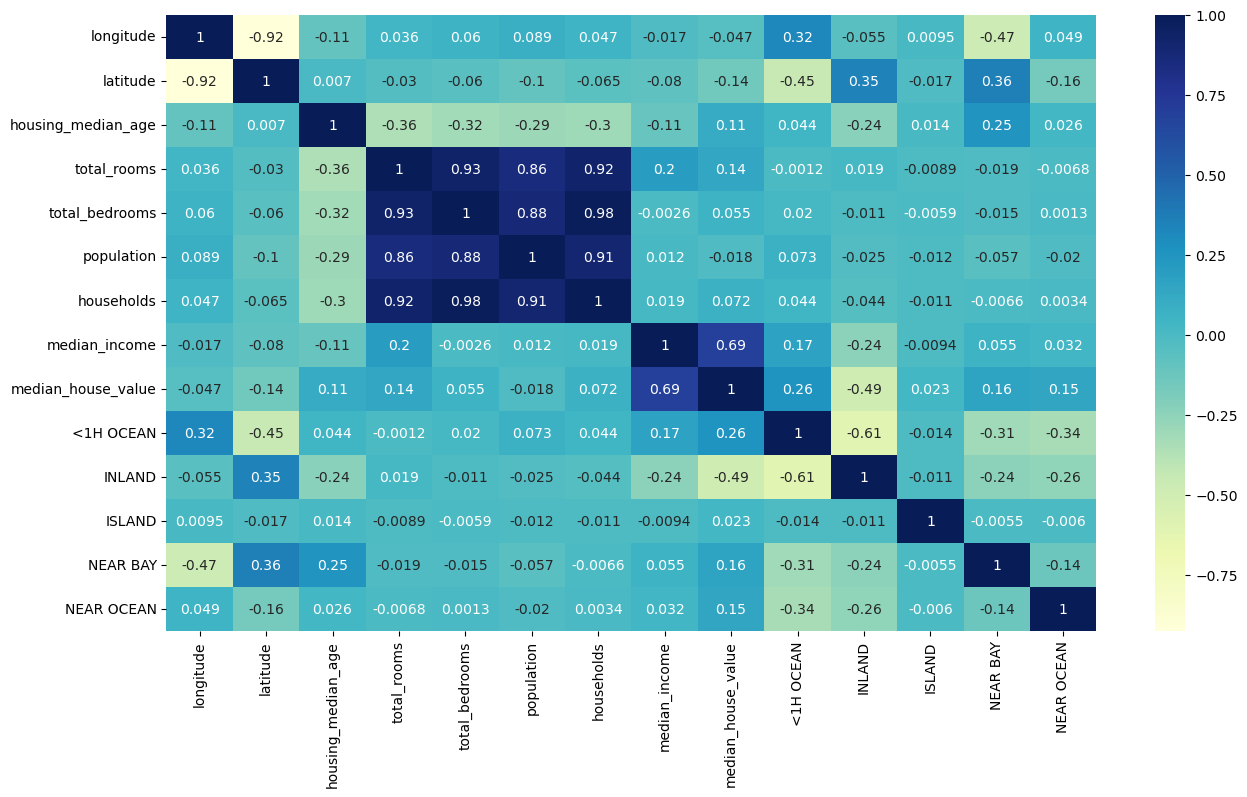

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

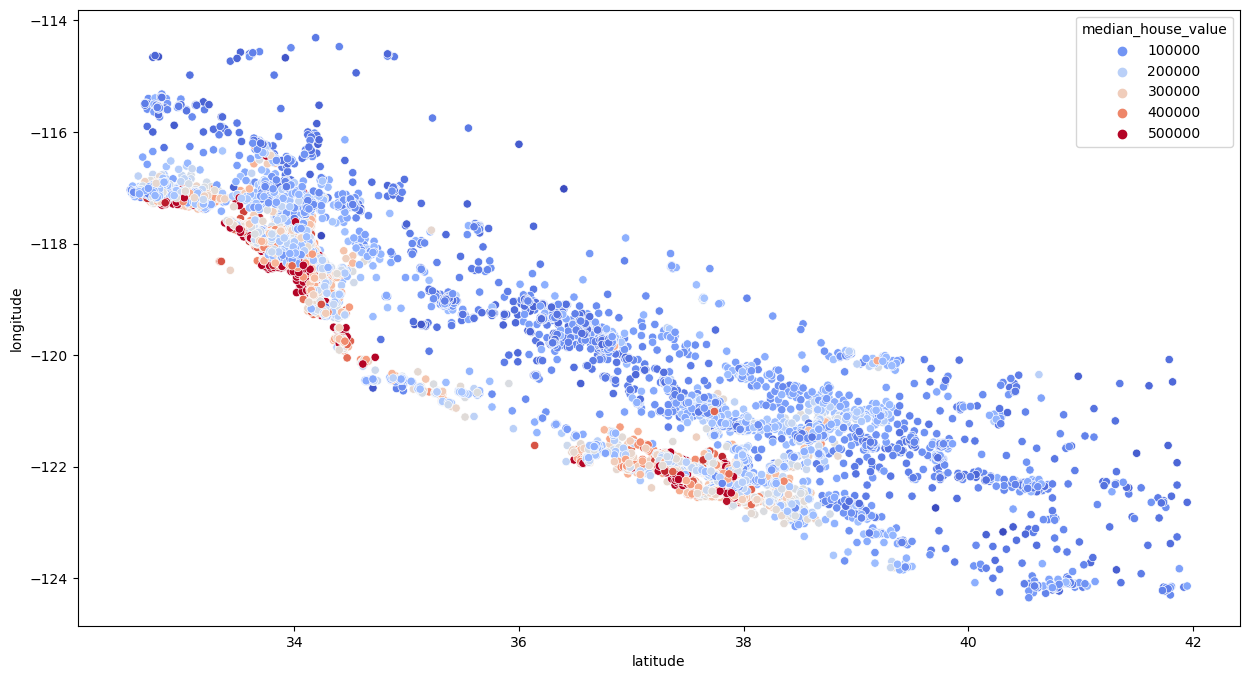

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude" , y = "longitude" , data=train_data , hue="median_house_value" , palette="coolwarm")

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17711,-121.81,37.33,4.0,5532.0,778.0,3651.0,770.0,7.2982,343000.0,True,False,False,False,False
19704,-121.64,39.11,18.0,3212.0,542.0,1817.0,508.0,3.3793,92900.0,False,True,False,False,False
9512,-123.21,39.15,52.0,1370.0,258.0,617.0,228.0,2.5500,112900.0,True,False,False,False,False
17710,-121.83,37.32,26.0,1125.0,210.0,943.0,214.0,4.8250,181000.0,True,False,False,False,False
239,-122.20,37.79,45.0,2021.0,528.0,1410.0,480.0,2.7788,115400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15143,-116.90,32.84,18.0,4215.0,810.0,2104.0,773.0,4.0873,146900.0,True,False,False,False,False
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,171300.0,True,False,False,False,False
7359,-118.18,33.96,20.0,427.0,118.0,402.0,105.0,1.4167,137500.0,True,False,False,False,False
17708,-121.82,37.32,10.0,2506.0,623.0,2634.0,622.0,3.1350,231400.0,True,False,False,False,False


In [23]:
#feature engineering

train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

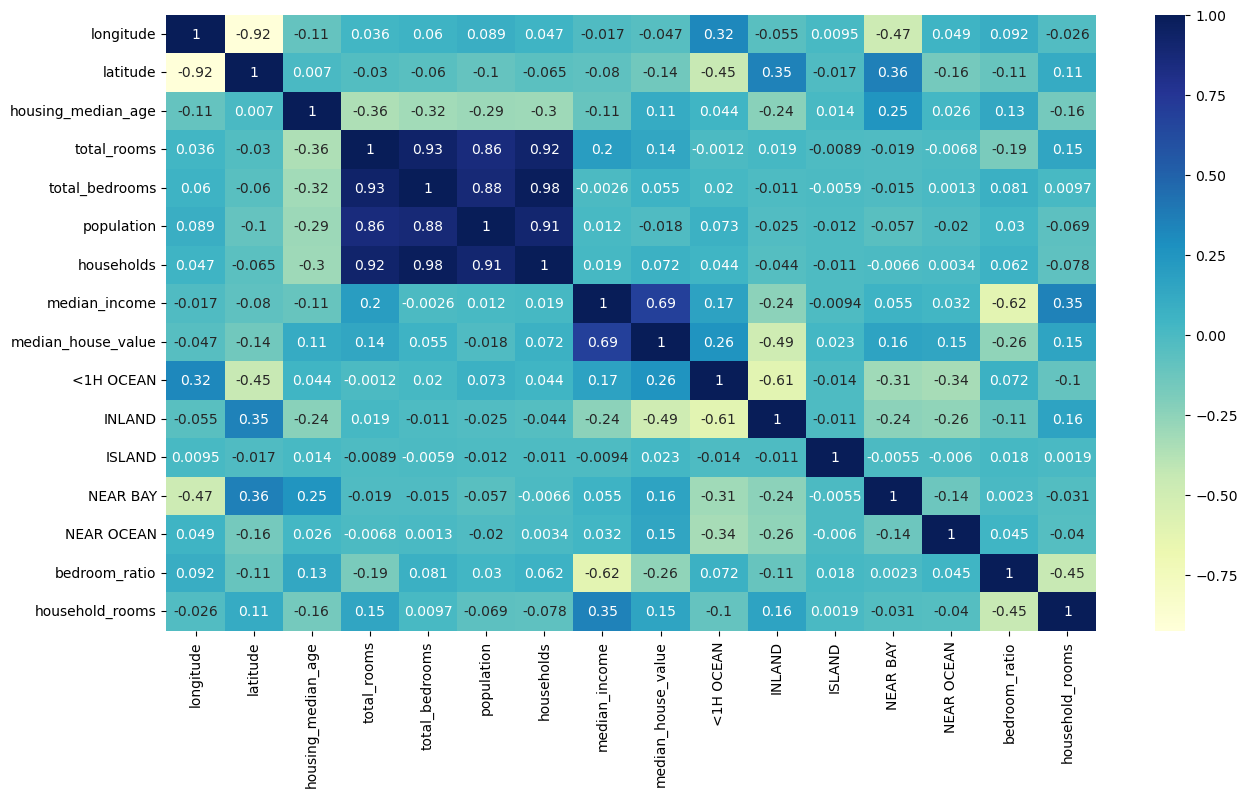

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot= True , cmap="YlGnBu" )

In [26]:
from sklearn.linear_model import LinearRegression
X_train , y_train = train_data.drop(['median_house_value'] , axis = 1) , train_data['median_house_value']
regressor = LinearRegression()
regressor.fit(X_train , y_train)

In [30]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data["total_rooms"] + 1)
test_data['total_bedrooms'] = np.log(test_data["total_bedrooms"] + 1)
test_data['population'] = np.log(test_data["population"] + 1)
test_data['households'] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [33]:
X_test , y_test = test_data.drop(["median_house_value"] , axis = 1) , test_data['median_house_value']

In [34]:
regressor.score(X_test , y_test)

-0.5466678270422447